# COVID-19 APP

#Interactive data visualisation part (1)

This Apps is for somes Covid-19 issues. It is is divided into 3 part:<br>
-The Dashboard (For visualizing the evolution)<br>
-Estimations and Stat (for some prediction, stat and simulation<br>
-GIS (for adding a spatial feature )<br>
<br>
this notebook show i how create the Interactive Data Visualization with the GUI Tkinter<br>
The dashboard will show graph of option Confirmed, Detahs and Recovered according to the selected country<br>
-ListCombo with: Countries<br>
-Checkbox with: Confirmed, Deaths, Recovered<br>

Data source: https://datahub.io/core/covid-19

In [1]:
#Library
import tkinter as tk
from tkinter import *
from tkinter import ttk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.backend_bases import key_press_handler
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

# Data loading

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv')


# Data exploration and correction


In [3]:
#First look
data.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


There is 8 features in the dataset. for the first dashboard part, only Date, Country, Confirmed, Recovered and Deaths are used. <br>


In [4]:
#Type of data
data.dtypes

Date               object
Country/Region     object
Province/State     object
Lat               float64
Long              float64
Confirmed         float64
Recovered         float64
Deaths            float64
dtype: object

the feature 'Date' is not in the correct type, it is set as a object <br>
In the next cell, we ll correct that issue

In [5]:
#time correction
time = []
for i in data['Date']:
    a = datetime.strptime(i, '%Y-%m-%d')
    time.append(a)
data = data.drop(['Date'], axis=1)
data.insert(0,'Date', time)


In [6]:
#After correction, time is now in a good type
data.dtypes

Date              datetime64[ns]
Country/Region            object
Province/State            object
Lat                      float64
Long                     float64
Confirmed                float64
Recovered                float64
Deaths                   float64
dtype: object

In [7]:
list_pays = data['Country/Region'].unique()


# Functions

In this step,  i will creat functions which both process data and creates the Tkinter canevas as the final issues is to have a Dynamic Tkinter Visualisation

In [8]:
#In this cell, we ll creat a fonction that select which select all needed features according to the country name

group_data = data.groupby('Country/Region')
def country_selection(country):
    country_data=(group_data.get_group(country))[['Date','Confirmed','Recovered','Deaths']]
    return country_data

The next function deals with 2 problems <br>
- it first calculates total cases of differents features <br>
- It secondly creates a canevas in Tkinter where these data ll be vizualised <br>

In [9]:
def total_stat(country):
    country_selected = country_selection(country)
    country_filtred = country_selected.groupby('Date').sum()
    
    recov_all = max(country_filtred['Recovered'])
    confirm_all = max(country_filtred['Confirmed'])
    die_all = max(country_filtred['Deaths'])
    
    info_frame = tk.LabelFrame(root, text='INFORMATION')
    confir_cas = tk.Label(info_frame, text = "Confirmed : \n %d" %(confirm_all), height=6, width=20, font='20')

    death_cas = tk.Label(info_frame, text = "Deaths : \n %d" %(die_all), height=6, width=20, font='20')

    recov_cas = tk.Label(info_frame, text = "Recovered : \n %d" %(recov_all), height=6, width=20, font='20')
    
    info_frame.grid(row=3, column=0)
    confir_cas.grid(row=0, column=5)
    death_cas.grid(row=1 , column=5)
    recov_cas.grid(row=3, column=5)



The following function deals with 3 problematics  <br>
- it firstly aims to draw different graphics <br>
- Secondly, it select differents cases according to option ticked in the dashboard <br>
- it finally draw the caneva in Tkinter

In [43]:
def tableau_pays2(country,recovered, deaths, confirmed):
    country_selected = country_selection(country)
    country_filtred = country_selected.groupby('Date').sum()
    
    selection = [recovered,deaths,confirmed]
    
    while 'non' in selection:
        selection.remove('non')
        
    
    image = Figure(figsize=(7,5), dpi=100)
    image.suptitle('Covid-19 Evolution in %s' %country)
    if len(selection)==0:
        image.add_subplot(111).plot()
    else: 
        for i in selection:      
            image.add_subplot(111).plot_date(country_filtred.index,country_filtred[i], linestyle='solid',label=i)
            
    image.autofmt_xdate()
    image.legend()
    
    canvas = FigureCanvasTkAgg(image, master=root)
    canvas.draw()
    canvas.get_tk_widget().grid(row=3, column=1)


# Example of graphics
the following function are not the one use in the App ( they don't creat a caneva). <br> It is the repeatition of the previous one with out creating caneva. <br>
The aim of this part is just to display graphics <br>
Let's randomly choose FRANCE for this example

In [44]:
#la fonction plot
def tableau_pays(country,recovered, deaths, confirmed):
    country_selected = country_selection(country)
    country_filtred = country_selected.groupby('Date').sum()
    
    
    if recovered == 'Recovered':
        plt.plot_date(country_filtred.index,country_filtred['Recovered'], label='Recovered')
        plt.fill_between(country_filtred.index,country_filtred['Recovered'], alpha=0.25)
        plt.gcf().autofmt_xdate()
    else:
        pass
    if deaths == 'Deaths':
        plt.plot_date(country_filtred.index,country_filtred['Deaths'], label='Deaths')
        plt.fill_between(country_filtred.index,country_filtred['Deaths'], alpha=0.25)
        plt.gcf().autofmt_xdate()
    else:
        pass
    if confirmed == 'Confirmed':
        plt.plot_date(country_filtred.index,country_filtred['Confirmed'], label='Confirmed')
        plt.fill_between(country_filtred.index,country_filtred['Confirmed'], alpha=0.25)
        plt.gcf().autofmt_xdate()
    else:
        plt.plot()
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Case')

In [45]:
def total_stat1(country):
    country_selected = country_selection(country)
    country_filtred = country_selected.groupby('Date').sum()
    
    recov_all = max(country_filtred['Recovered'])
    confirm_all = max(country_filtred['Confirmed'])
    die_all = max(country_filtred['Deaths'])
    
    print('Recovered = %d' %(recov_all))
    print('Confirmed = %d' %(confirm_all))
    print('Deaths = %d' %(die_all))

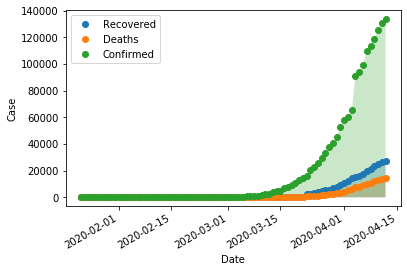

In [46]:
tableau_pays('France','Recovered','Deaths','Confirmed')

In [47]:
total_stat1('France')

Recovered = 27469
Confirmed = 133670
Deaths = 14412


# Tkinter Action
Let's travel a bit to the future. We want an interactive Dashboard, it means that some action will be excute according to the use  <br>
So, in this part we ll creat these actions 

We ll firstly creat the main windows with its name and a introduction or title


In [48]:
root = tk.Tk()
root.title("COVID-19 EVOLUTION " )
root.minsize(640,480)
intro = tk.Label(root, text="COVID-19 EVOLUTION / COUNTRY" , font='times 15 bold underline')

Initialisation <br>
For making it fun by having a starting plot we will set some constants

In [49]:
confirm_choice='Confirmed'
die_choice='Deaths'
recov_choice='Recovered'
select='Afghanistan'

In [50]:
#here, we also initialize stat canevas
country_selected = country_selection(select)
country_filtred = country_selected.groupby('Date').sum()
recov_all = sum(country_filtred['Recovered'])
confirm_all = sum(country_filtred['Confirmed'])
die_all = sum(country_filtred['Deaths'])

Action
this part deals will action ( or function ) that will be performed when we interate with the dashnboard

In [51]:
#Confirmed button, it starts with a variable that ll take a value when the case confirmed is checked or not
#then it continues with others operations like plotting, getting others variables

confirm_Var = StringVar() # a variable which take the value

def confirm_action():
    
    confirm_choice = confirm_Var.get()
    die_choice = die_Var.get()
    recov_choice = recov_Var.get()
    select = pays_combo.get()
    
    #print(confirm_choice)  # this line is for ppl who want to see the process
    image2 = tableau_pays2(select,recov_choice, die_choice, confirm_choice)



In [52]:
#same with deaths
die_Var = StringVar()
def die_action():
    
    confirm_choice = confirm_Var.get()
    die_choice = die_Var.get()
    recov_choice = recov_Var.get()
    select = pays_combo.get()
    
    print(die_choice)
    image2 = tableau_pays2(select,recov_choice, die_choice, confirm_choice)

In [53]:
#let's not forget recovered
recov_Var = StringVar()
def recov_action():
    
    confirm_choice = confirm_Var.get()
    die_choice = die_Var.get()
    recov_choice = recov_Var.get()
    select = pays_combo.get()
    
    #print(recov_choice)
    image2 = tableau_pays2(select,recov_choice, die_choice, confirm_choice)

In [54]:
# A action will also be perfom when we change country. Below the action

def action(event):
    confirm_choice = confirm_Var.get()
    die_choice = die_Var.get()
    recov_choice = recov_Var.get()
    select = pays_combo.get()
    #print(select)
    image2 = tableau_pays2(select,recov_choice, die_choice, confirm_choice)
    total_stat(select)

# Tkinter Vusalisation
this is the last part of the apps.
Here, we will creat canevas, button, and so list, checkbox..

We start by creating, a combo list of countres. 

In [55]:
list_pays = list(list_pays)

pays_combo = ttk.Combobox(root, text='COUNTRY SELECTION', values = list_pays, width=32)
pays_combo.current(0)
pays_combo.bind("<<ComboboxSelected>>", action)

'2642345729928action'

Below, we creat a main frame that contain chechkedbox Confirmed, Recovered and Deaths

In [56]:
cas_frame = tk.LabelFrame(root, width=300, height=200, text='SITUATION')

check_widget1 = tk.Checkbutton(cas_frame, text="Confirmed",
                               variable=confirm_Var, onvalue='Confirmed', offvalue='non', command=confirm_action)
check_widget2 = tk.Checkbutton(cas_frame, text="Recovered", 
                               variable=recov_Var, onvalue='Recovered', offvalue='non', command=recov_action)
check_widget3 = tk.Checkbutton(cas_frame, text="Deaths", 
                               variable=die_Var, onvalue='Deaths', offvalue='non', command=die_action)


So far, we just have button, let's below creat the initial visualisation according to initial parameter <br>
What we need is just the statistics and the graphs

In [57]:
total_stat(select)
image2 = tableau_pays2(select,recov_choice, die_choice, confirm_choice)

Recovered = 32
Confirmed = 607
Deaths = 18


C:\Users\chand\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


it all over, but we have nothing so far. What is fun with Tkinter is that we can creat objects and not vizualise it. <br>
what is a bit weird !<br>
However, it is normal because we need to specify object locations<br>
it is what we are going to do below <br>

In [40]:
intro.grid(row=0, column=1)
pays_combo.grid(row=1, column=0, pady=2)
cas_frame.grid(row=2, column=0, pady=2)

check_widget1.grid(row=0, column=1)
check_widget2.grid(row=0, column=2)
check_widget3.grid(row=0, column=3)

root.mainloop()

Deaths


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\chand\Anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas\_libs\index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: ''

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\chand\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-33-7889d17e270d>", line 11, in die_action
    image2 = tableau_pays2(select,recov_choice, die_choice, confirm_choice)
  File "<ipython-input-10-a7

non


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\chand\Anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas\_libs\index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: ''

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\chand\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-33-7889d17e270d>", line 11, in die_action
    image2 = tableau_pays2(select,recov_choice, die_choice, confirm_choice)
  File "<ipython-input-10-a7

Deaths
Recovered = 128
Confirmed = 638
Deaths = 29
Recovered = 197
Confirmed = 1013
Deaths = 13
Recovered = 32
Confirmed = 607
Deaths = 18
